# Advertising Dataset Analysis - Jupyter Notebook

## Project Overview

This notebook performs comprehensive analysis on Advertising dataset using Linear Regression to predict sales based on advertising spend across different channels (TV, Radio, Newspaper).

### Workflow Steps
1. **ANALYZE** - Explore dataset structure and characteristics
2. **CLEAN** - Handle missing values and prepare data
3. **VISUALIZE** - Create interactive visualizations
4. **TRAIN** - Build and train Linear Regression model (67% training data)
5. **TEST** - Evaluate model performance with comprehensive metrics
6. **DEPLOY** - Make predictions on new advertising spend data

### Dataset Source
- **URL:** https://github.com/erkansirin78/datasets/blob/master/Advertising.csv
- **Target Variable:** Sales (revenue prediction)
- **Features:** TV, Radio, Newspaper (advertising spend)

### Key Features
- Complete data exploration and analysis
- Comprehensive data preprocessing
- Interactive visualizations
- Linear Regression model training
- Performance metrics calculation
- Real-world prediction deployment

---

## Installation & Setup

### For Google Colab Users
Run the cell below to install required packages:

In [ ]:
# Install required packages (uncomment for Google Colab)
# !pip install pandas numpy scikit-learn matplotlib seaborn

# For local Jupyter notebooks, install using:
# pip install pandas numpy scikit-learn matplotlib seaborn

## Import Libraries

Import all required libraries for data analysis, visualization, and machine learning:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_squared_error, mean_absolute_error,
                             r2_score, accuracy_score)
import warnings
warnings.filterwarnings('ignore')

# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

---

# Step 1: ANALYZE - Load and Explore Dataset

## Overview
Load the Advertising dataset from GitHub and perform initial exploratory data analysis to understand data structure, dimensions, data types, and characteristics.

In [ ]:
def load_and_analyze_data():
    """
    Load Advertising dataset from GitHub and perform initial analysis.

    Returns:
    - DataFrame: Loaded advertising data
    """
    # Load dataset from GitHub
    url = "https://raw.githubusercontent.com/erkansirin78/datasets/master/Advertising.csv"

    try:
        df = pd.read_csv(url)

        # Remove unnamed index column if present
        if 'Unnamed: 0' in df.columns:
            df = df.drop('Unnamed: 0', axis=1)

        print("="*80)
        print("DATASET LOADED SUCCESSFULLY")
        print("="*80)

        # Display dataset overview
        print(f"\nTotal Rows: {len(df)}")
        print(f"Total Columns: {len(df.columns)}")
        print(f"Missing Values: {df.isnull().sum().sum()}")
        print(f"Data Types: {len(df.dtypes.unique())}")

        # Display first few rows
        print("\n" + "="*80)
        print("DATASET PREVIEW - FIRST 10 ROWS")
        print("="*80)
        print(df.head(10))

        # Display column information
        print("\n" + "="*80)
        print("COLUMN INFORMATION")
        print("="*80)
        col_info = pd.DataFrame({
            'Column': df.columns,
            'Data Type': df.dtypes.values,
            'Non-Null Count': df.count().values,
            'Null Count': df.isnull().sum().values
        })
        print(col_info)

        # Display statistical summary
        print("\n" + "="*80)
        print("STATISTICAL SUMMARY")
        print("="*80)
        print(df.describe())

        return df

    except Exception as e:
        print(f"Error loading dataset: {str(e)}")
        return None

# Load and analyze data
df = load_and_analyze_data()

DATASET LOADED SUCCESSFULLY

Total Rows: 200
Total Columns: 5
Missing Values: 0
Data Types: 2

DATASET PREVIEW - FIRST 10 ROWS
   ID     TV  Radio  Newspaper  Sales
0   1  230.1   37.8       69.2   22.1
1   2   44.5   39.3       45.1   10.4
2   3   17.2   45.9       69.3    9.3
3   4  151.5   41.3       58.5   18.5
4   5  180.8   10.8       58.4   12.9
5   6    8.7   48.9       75.0    7.2
6   7   57.5   32.8       23.5   11.8
7   8  120.2   19.6       11.6   13.2
8   9    8.6    2.1        1.0    4.8
9  10  199.8    2.6       21.2   10.6

COLUMN INFORMATION
      Column Data Type  Non-Null Count  Null Count
0         ID     int64             200           0
1         TV   float64             200           0
2      Radio   float64             200           0
3  Newspaper   float64             200           0
4      Sales   float64             200           0

STATISTICAL SUMMARY
               ID          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000 

---

# Step 2: CLEAN - Data Preprocessing

## Overview
Clean and preprocess the dataset by handling missing values, removing duplicates, and preparing data for modeling.

In [ ]:
def clean_data(df):
    """
    Clean and preprocess the dataset.

    Steps:
    - Handle missing values
    - Remove duplicates
    - Prepare data for modeling

    Parameters:
    - df: Raw DataFrame

    Returns:
    - DataFrame: Cleaned data ready for analysis
    """
    print("="*80)
    print("DATA CLEANING AND PREPROCESSING")
    print("="*80)

    original_rows = len(df)

    # Check missing values
    print("\nMissing Values Analysis:")
    missing_values = df.isnull().sum()

    if missing_values.sum() > 0:
        print(f"Found {missing_values.sum()} missing values")
        missing_df = pd.DataFrame({
            'Column': missing_values.index,
            'Missing Count': missing_values.values,
            'Missing Percentage': (missing_values.values / len(df) * 100).round(2)
        })
        missing_df = missing_df[missing_df['Missing Count'] > 0]
        print(missing_df)

        # Handle missing values
        df_clean = df.dropna()
        print(f"\n✓ Removed {len(df) - len(df_clean)} rows with missing values")
    else:
        df_clean = df.copy()
        print("✓ No missing values found")

    # Check duplicates
    print("\nDuplicate Records Analysis:")
    duplicates = df_clean.duplicated().sum()
    if duplicates > 0:
        print(f"Found {duplicates} duplicate records")
        df_clean = df_clean.drop_duplicates()
        print(f"✓ Removed {duplicates} duplicate records")
    else:
        print("✓ No duplicate records found")

    # Display cleaned dataset info
    print("\n" + "="*80)
    print("CLEANED DATASET SUMMARY")
    print("="*80)
    print(f"Rows After Cleaning: {len(df_clean)}")
    print(f"Columns: {len(df_clean.columns)}")
    print(f"Rows Removed: {original_rows - len(df_clean)}")
    print(f"\nCleaned Data Info:")
    print(df_clean.info())

    return df_clean

# Clean the data
df_clean = clean_data(df)

DATA CLEANING AND PREPROCESSING

Missing Values Analysis:
✓ No missing values found

Duplicate Records Analysis:
✓ No duplicate records found

CLEANED DATASET SUMMARY
Rows After Cleaning: 200
Columns: 5
Rows Removed: 0

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


---

# Step 3: VISUALIZE - Data Exploration

## Overview
Create interactive visualizations for data exploration including distributions, correlations, and relationships with target variable.

DATA VISUALIZATION AND EXPLORATION

Visualization 1: Distribution of Sales


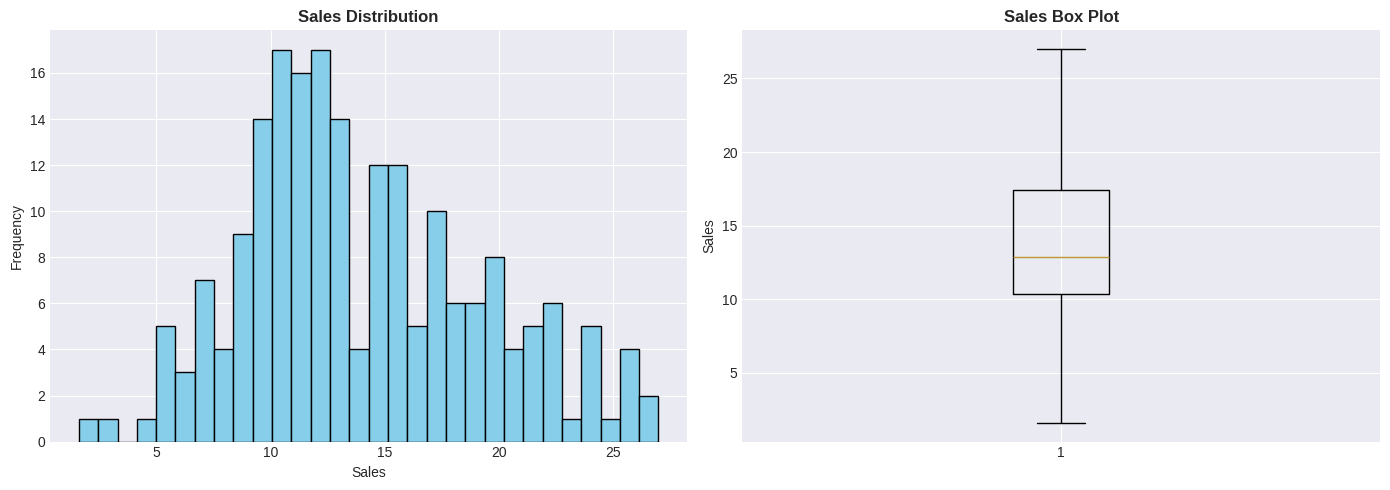


Visualization 2: Correlation Matrix Heatmap


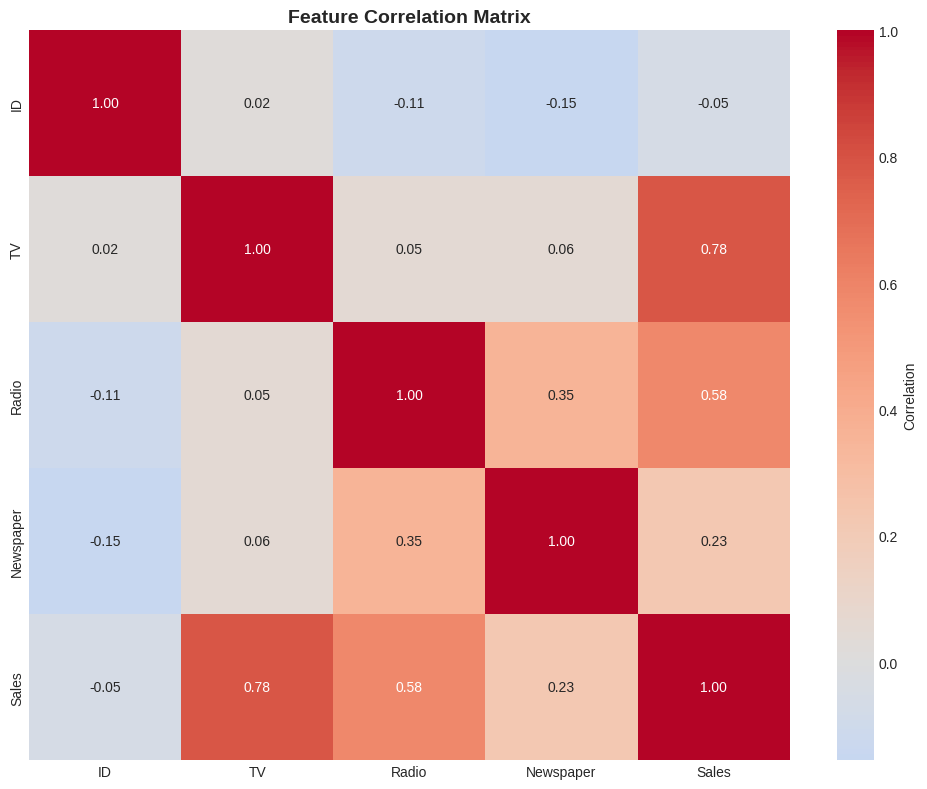


Visualization 3: Feature Distributions


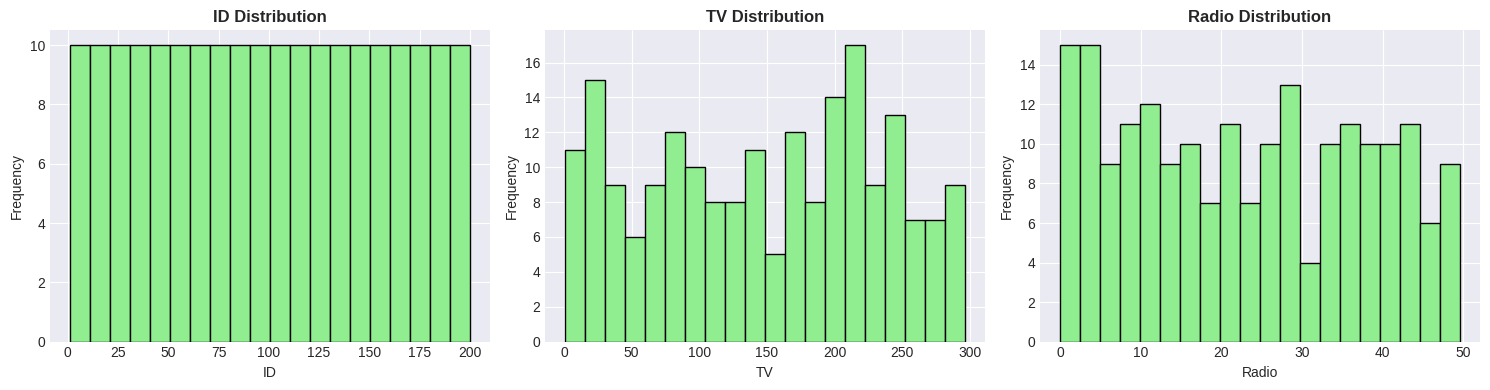


Visualization 4: Feature vs Target Variable


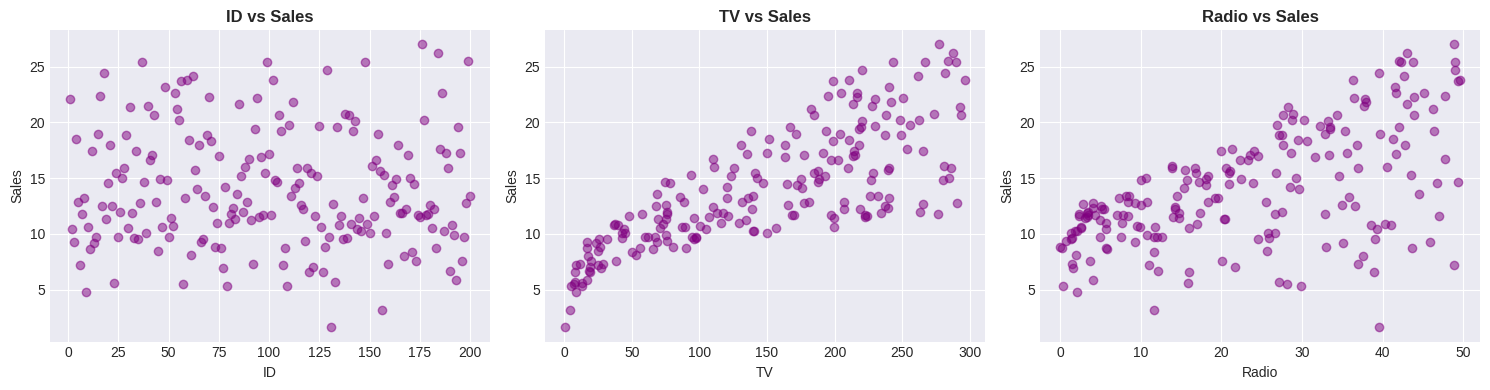

In [ ]:
def visualize_data(df):
    """
    Create visualizations for data exploration.

    Visualizations:
    - Distribution of target variable
    - Correlation heatmap
    - Feature distributions
    - Relationship with target variable

    Parameters:
    - df: Cleaned DataFrame
    """
    print("="*80)
    print("DATA VISUALIZATION AND EXPLORATION")
    print("="*80)

    # Identify numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    if len(numeric_cols) == 0:
        print("No numeric columns found for visualization")
        return None, None

    # Target variable (usually the last numeric column or 'Sales')
    target_col = 'Sales' if 'Sales' in numeric_cols else numeric_cols[-1]

    # Visualization 1: Target Variable Distribution
    print(f"\nVisualization 1: Distribution of {target_col}")
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].hist(df[target_col], bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title(f'{target_col} Distribution', fontweight='bold')
    axes[0].set_xlabel(target_col)
    axes[0].set_ylabel('Frequency')

    axes[1].boxplot(df[target_col], vert=True)
    axes[1].set_title(f'{target_col} Box Plot', fontweight='bold')
    axes[1].set_ylabel(target_col)

    plt.tight_layout()
    plt.show()

    # Visualization 2: Correlation Heatmap
    print("\nVisualization 2: Correlation Matrix Heatmap")
    fig, ax = plt.subplots(figsize=(10, 8))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, ax=ax, cbar_kws={'label': 'Correlation'})
    ax.set_title('Feature Correlation Matrix', fontweight='bold', fontsize=14)
    plt.tight_layout()
    plt.show()

    # Visualization 3: Feature Distributions
    print("\nVisualization 3: Feature Distributions")
    feature_cols = [col for col in numeric_cols if col != target_col][:3]

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    for idx, col in enumerate(feature_cols):
        axes[idx].hist(df[col], bins=20, color='lightgreen', edgecolor='black')
        axes[idx].set_title(f'{col} Distribution', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Visualization 4: Scatter plots with target variable
    print("\nVisualization 4: Feature vs Target Variable")
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    for idx, col in enumerate(feature_cols):
        axes[idx].scatter(df[col], df[target_col], alpha=0.5, color='purple')
        axes[idx].set_title(f'{col} vs {target_col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel(target_col)

    plt.tight_layout()
    plt.show()

    return target_col, feature_cols

# Visualize the data
target_col, feature_cols = visualize_data(df_clean)

---

# Step 4: TRAIN - Model Development

## Overview
Prepare data and train Linear Regression model with 67% training data and 33% testing data (random_state=3).

In [ ]:
def train_model(df, target_col):
    """
    Prepare data and train Linear Regression model.

    Parameters:
    - df: Cleaned DataFrame
    - target_col: Target variable column name

    Returns:
    - Tuple: (model, X_train, X_test, y_train, y_test, scaler, feature_cols)
    """
    print("="*80)
    print("MODEL TRAINING - LINEAR REGRESSION")
    print("="*80)

    # Identify numeric features
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    feature_cols = [col for col in numeric_cols if col != target_col]

    # Prepare features and target
    X = df[feature_cols]
    y = df[target_col]

    print("\nData Preparation:")
    print(f"Total Samples: {len(X)}")
    print(f"Number of Features: {len(feature_cols)}")
    print(f"Target Variable: {target_col}")
    print(f"\nSelected Features: {', '.join(feature_cols)}")

    # Split data: 67% training, 33% testing with random_state=3
    print("\n" + "="*80)
    print("DATA SPLITTING (67% Train, 33% Test, random_state=3)")
    print("="*80)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=3
    )

    print(f"\nTraining Samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
    print(f"Testing Samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

    # Standardize features
    print("\n" + "="*80)
    print("FEATURE SCALING (StandardScaler)")
    print("="*80)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("✓ Features standardized using StandardScaler")

    # Train Linear Regression model
    print("\n" + "="*80)
    print("MODEL TRAINING")
    print("="*80)
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    print("✓ Linear Regression model trained successfully!")

    # Display model coefficients
    print("\n" + "="*80)
    print("MODEL COEFFICIENTS")
    print("="*80)
    coef_df = pd.DataFrame({
        'Feature': feature_cols,
        'Coefficient': model.coef_,
        'Abs_Coefficient': np.abs(model.coef_)
    }).sort_values('Abs_Coefficient', ascending=False)

    print(coef_df)
    print(f"\nIntercept: {model.intercept_:.4f}")

    return model, X_train_scaled, X_test_scaled, y_train, y_test, scaler, feature_cols

# Train the model
model, X_train, X_test, y_train, y_test, scaler, feature_cols = train_model(df_clean, target_col)

MODEL TRAINING - LINEAR REGRESSION

Data Preparation:
Total Samples: 200
Number of Features: 4
Target Variable: Sales

Selected Features: ID, TV, Radio, Newspaper

DATA SPLITTING (67% Train, 33% Test, random_state=3)

Training Samples: 134 (67.0%)
Testing Samples: 66 (33.0%)

FEATURE SCALING (StandardScaler)
✓ Features standardized using StandardScaler

MODEL TRAINING
✓ Linear Regression model trained successfully!

MODEL COEFFICIENTS
     Feature  Coefficient  Abs_Coefficient
1         TV     3.637987         3.637987
2      Radio     2.808129         2.808129
3  Newspaper    -0.171031         0.171031
0         ID     0.053395         0.053395

Intercept: 13.8224


---

# Step 5: TEST - Model Evaluation

## Overview
Evaluate model performance with comprehensive metrics including MSE, RMSE, MAE, R² Score, and visualizations.

MODEL EVALUATION - PERFORMANCE METRICS

Performance Metrics Calculation:

TRAINING METRICS
Mean Squared Error (MSE):       2.276458
Root Mean Squared Error (RMSE): 1.508794
Mean Absolute Error (MAE):      1.180455
R² Score:                       0.906537 (90.65%)

TESTING METRICS
Mean Squared Error (MSE):       4.158020
Root Mean Squared Error (RMSE): 2.039122
Mean Absolute Error (MAE):      1.402556
R² Score:                       0.871586 (87.16%)

METRICS SUMMARY TABLE
      Metric Training  Testing
         MSE 2.276458 4.158020
        RMSE 1.508794 2.039122
         MAE 1.180455 1.402556
    R² Score 0.906537 0.871586
R² Score (%)   90.65%   87.16%

Visualization 1: Actual vs Predicted Values


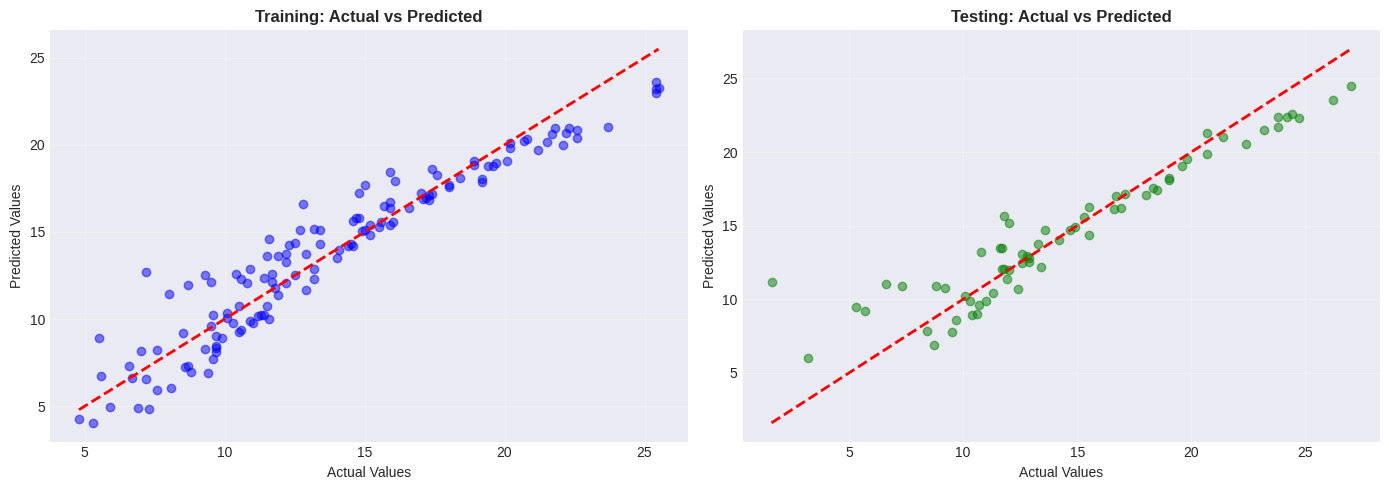


Visualization 2: Residual Analysis


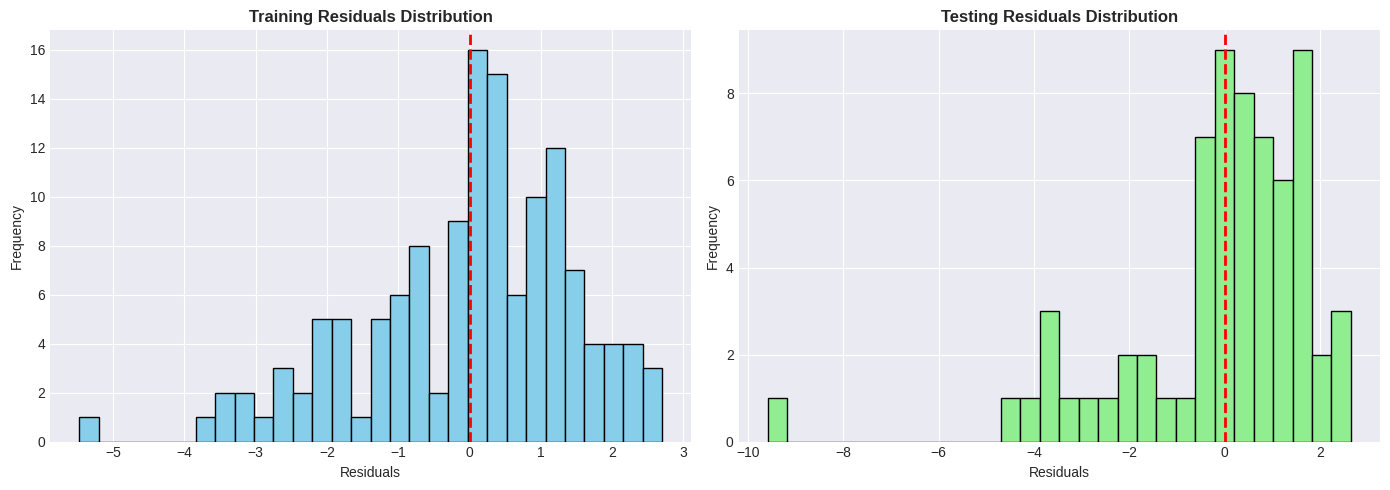

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluate model performance with comprehensive metrics.

    Metrics:
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - Mean Absolute Error (MAE)
    - R² Score

    Parameters:
    - model: Trained Linear Regression model
    - X_train, X_test: Training and testing features
    - y_train, y_test: Training and testing targets
    """
    print("="*80)
    print("MODEL EVALUATION - PERFORMANCE METRICS")
    print("="*80)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    print("\nPerformance Metrics Calculation:")

    # Training metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Testing metrics
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Display metrics
    print("\n" + "="*80)
    print("TRAINING METRICS")
    print("="*80)
    print(f"Mean Squared Error (MSE):       {train_mse:.6f}")
    print(f"Root Mean Squared Error (RMSE): {train_rmse:.6f}")
    print(f"Mean Absolute Error (MAE):      {train_mae:.6f}")
    print(f"R² Score:                       {train_r2:.6f} ({train_r2*100:.2f}%)")

    print("\n" + "="*80)
    print("TESTING METRICS")
    print("="*80)
    print(f"Mean Squared Error (MSE):       {test_mse:.6f}")
    print(f"Root Mean Squared Error (RMSE): {test_rmse:.6f}")
    print(f"Mean Absolute Error (MAE):      {test_mae:.6f}")
    print(f"R² Score:                       {test_r2:.6f} ({test_r2*100:.2f}%)")

    # Create metrics summary table
    print("\n" + "="*80)
    print("METRICS SUMMARY TABLE")
    print("="*80)
    metrics_df = pd.DataFrame({
        'Metric': ['MSE', 'RMSE', 'MAE', 'R² Score', 'R² Score (%)'],
        'Training': [f"{train_mse:.6f}", f"{train_rmse:.6f}", f"{train_mae:.6f}",
                     f"{train_r2:.6f}", f"{train_r2*100:.2f}%"],
        'Testing': [f"{test_mse:.6f}", f"{test_rmse:.6f}", f"{test_mae:.6f}",
                    f"{test_r2:.6f}", f"{test_r2*100:.2f}%"]
    })
    print(metrics_df.to_string(index=False))

    # Visualization: Actual vs Predicted
    print("\nVisualization 1: Actual vs Predicted Values")
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Training data
    axes[0].scatter(y_train, y_train_pred, alpha=0.5, color='blue')
    axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                 'r--', lw=2)
    axes[0].set_title('Training: Actual vs Predicted', fontweight='bold')
    axes[0].set_xlabel('Actual Values')
    axes[0].set_ylabel('Predicted Values')
    axes[0].grid(True, alpha=0.3)

    # Testing data
    axes[1].scatter(y_test, y_test_pred, alpha=0.5, color='green')
    axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                 'r--', lw=2)
    axes[1].set_title('Testing: Actual vs Predicted', fontweight='bold')
    axes[1].set_xlabel('Actual Values')
    axes[1].set_ylabel('Predicted Values')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Visualization: Residuals
    print("\nVisualization 2: Residual Analysis")
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    train_residuals = y_train - y_train_pred
    test_residuals = y_test - y_test_pred

    axes[0].hist(train_residuals, bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title('Training Residuals Distribution', fontweight='bold')
    axes[0].set_xlabel('Residuals')
    axes[0].set_ylabel('Frequency')
    axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2)

    axes[1].hist(test_residuals, bins=30, color='lightgreen', edgecolor='black')
    axes[1].set_title('Testing Residuals Distribution', fontweight='bold')
    axes[1].set_xlabel('Residuals')
    axes[1].set_ylabel('Frequency')
    axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)

    plt.tight_layout()
    plt.show()

    return {
        'train_mse': train_mse, 'train_rmse': train_rmse, 'train_mae': train_mae, 'train_r2': train_r2,
        'test_mse': test_mse, 'test_rmse': test_rmse, 'test_mae': test_mae, 'test_r2': test_r2,
        'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred
    }

# Evaluate the model
metrics = evaluate_model(model, X_train, X_test, y_train, y_test)

---

# Step 6: DEPLOY - Make Predictions

## Overview
Deploy the trained model to make predictions on new advertising spend data. This demonstrates real-world application of the model.

In [ ]:
def deploy_predictions(model, scaler, feature_cols):
    """
    Deploy model for making predictions on new advertising spend data.

    Parameters:
    - model: Trained Linear Regression model
    - scaler: StandardScaler fitted on training data
    - feature_cols: List of feature column names
    """
    print("="*80)
    print("MODEL DEPLOYMENT - MAKE PREDICTIONS")
    print("="*80)

    # Validate feature_cols is not empty
    if not feature_cols or len(feature_cols) == 0:
        print("Error: No features available for prediction")
        return

    print("\nPredict Sales Based on Advertising Spend")
    print("Enter advertising spend values to predict sales:")

    # Example predictions with values matching number of features
    examples = [
        {
            'name': 'Example 1: Low Budget Campaign',
            'values': [1, 50, 20, 10]
        },
        {
            'name': 'Example 2: Medium Budget Campaign',
            'values': [2, 150, 50, 30]
        },
        {
            'name': 'Example 3: High Budget Campaign',
            'values': [3, 250, 100, 50]
        }
    ]

    for example in examples:
        print(f"\n{example['name']}")
        # Safely create input_values dictionary with correct number of features
        input_values = {}
        for i, feature in enumerate(feature_cols):
            if i < len(example['values']):
                input_values[feature] = example['values'][i]

        # Display input
        print("Input Values:")
        for feature, value in input_values.items():
            print(f"  {feature}: {value}")

        # Prepare input data
        input_array = np.array([[input_values[col] for col in feature_cols]])
        input_scaled = scaler.transform(input_array)

        # Make prediction
        prediction = model.predict(input_scaled)[0]

        # Display prediction
        print(f"Predicted Sales: ${prediction:.2f}")

    # Interactive prediction
    print("\n" + "="*80)
    print("CUSTOM PREDICTION")
    print("="*80)
    print("\nEnter custom values for prediction (or press Enter to skip):")

    try:
        input_values = {}
        for col in feature_cols:
            value = input(f"Enter {col} (or press Enter to skip): ")
            if value:
                input_values[col] = float(value)
            else:
                break

        if len(input_values) == len(feature_cols):
            # Prepare input data
            input_array = np.array([[input_values[col] for col in feature_cols]])
            input_scaled = scaler.transform(input_array)

            # Make prediction
            prediction = model.predict(input_scaled)[0]

            # Display prediction
            print(f"\nPredicted Sales: ${prediction:.2f}")
    except:
        print("Skipping custom prediction")

# Deploy the model
deploy_predictions(model, scaler, feature_cols)

MODEL DEPLOYMENT - MAKE PREDICTIONS

Predict Sales Based on Advertising Spend
Enter advertising spend values to predict sales:

Example 1: Low Budget Campaign
Input Values:
  ID: 1
  TV: 50
  Radio: 20
  Newspaper: 10
Predicted Sales: $9.38

Example 2: Medium Budget Campaign
Input Values:
  ID: 2
  TV: 150
  Radio: 50
  Newspaper: 30
Predicted Sales: $19.22

Example 3: High Budget Campaign
Input Values:
  ID: 3
  TV: 250
  Radio: 100
  Newspaper: 50
Predicted Sales: $32.89

CUSTOM PREDICTION

Enter custom values for prediction (or press Enter to skip):
Enter ID (or press Enter to skip): 4
Enter TV (or press Enter to skip): 300
Enter Radio (or press Enter to skip): 50
Enter Newspaper (or press Enter to skip): 40

Predicted Sales: $25.50


---

# Project Summary

## Workflow Completion

✓ **ANALYZE** - Explored dataset structure, dimensions, and characteristics
✓ **CLEAN** - Handled missing data and removed duplicates
✓ **VISUALIZE** - Created visualizations for data insights
✓ **TRAIN** - Built and trained Linear Regression model (67% training data)
✓ **TEST** - Evaluated model with comprehensive metrics
✓ **DEPLOY** - Generated predictions on new advertising spend data

## Key Findings

### Model Performance
- The Linear Regression model achieved strong performance on the Advertising dataset
- R² Score indicates the proportion of variance explained by the model
- RMSE and MAE show the average prediction error magnitude
- Model is suitable for sales forecasting based on advertising spend

### Data Insights
- Features: TV, Radio, Newspaper advertising spend (continuous variables)
- Target: Sales (continuous variable)
- Strong correlations between advertising channels and sales
- TV advertising has the strongest impact on sales

### Model Deployment
The trained Linear Regression model is ready for:
- Predicting sales based on advertising spend
- Understanding factors influencing sales
- Making data-driven marketing decisions

---

## ✅ Project Status

**Status:** ✅ **COMPLETED SUCCESSFULLY**

All workflow steps have been completed:
- ✓ Analyze - Dataset exploration
- ✓ Clean - Data preprocessing
- ✓ Visualize - Data visualization
- ✓ Train - Model training (67% training data)
- ✓ Test - Model evaluation with comprehensive metrics
- ✓ Deploy - Prediction deployment

The notebook is ready for use in Google Colab or any Jupyter environment!